In [98]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [71]:
# get titanic & test csv files as a DataFrame
#titanic_df = pd.read_csv("data/train.csv")
#test_df    = pd.read_csv("data/test.csv")

In [72]:
# vamos a hacer nuestro propio split para tener la Y en el test set y poder obtener el score sobre el test set, ademas de poder comprobar si nos estaria haciendo overfitting por ejemplo
df    = pd.read_csv("../data/data.csv")
titanic_df, test_df = train_test_split(df, test_size=0.2, random_state=50,stratify=df['Survived'])

In [73]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S


In [74]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S


In [75]:
print(titanic_df.info())
print("----------------------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 539 to 847
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
None
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 193 to 190
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

In [76]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['PassengerId','Name','Ticket'], axis=1)

/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


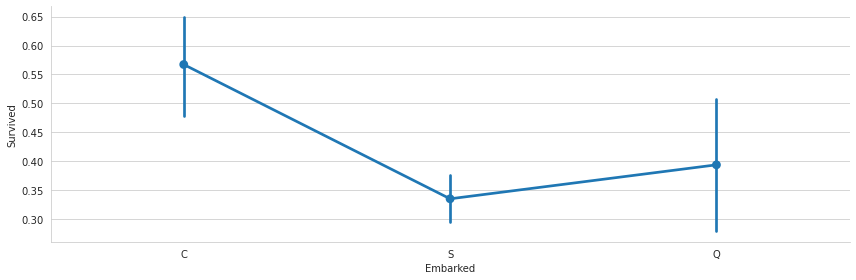

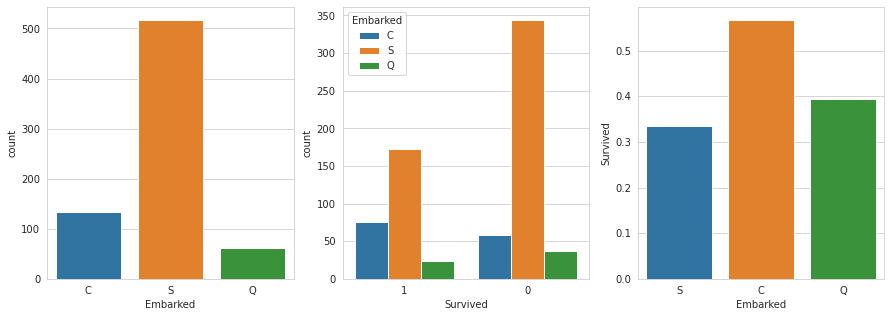

In [77]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

<AxesSubplot:xlabel='Survived'>

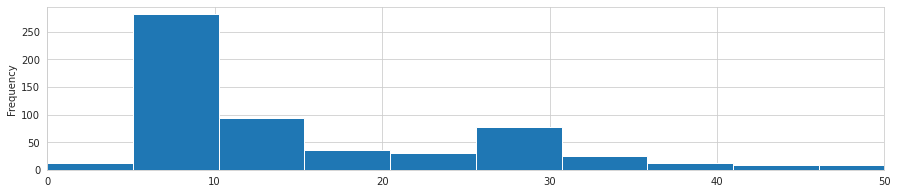

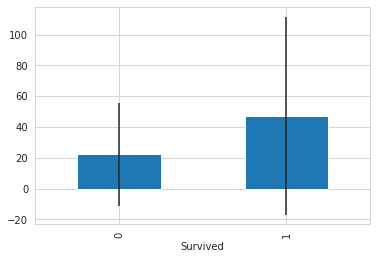

In [78]:
# Fare
# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [79]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction in this simple model
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [80]:
# Age 
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

<ipython-input-80-4cd309b98c1f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
<ipython-input-80-4cd309b98c1f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Age"][np.isnan(test_df["Age"])] = rand_2


/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/natxo/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


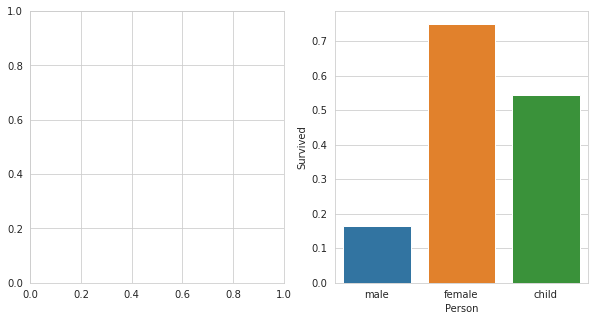

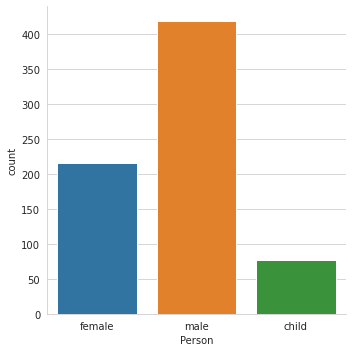

In [81]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
#sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

In [82]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]

X_test  = test_df.drop(["Survived"],axis=1).copy()
Y_test = test_df["Survived"]

In [83]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,Child,Female
539,1,22,0,2,49,1,0,0,1
177,1,50,0,0,28,1,0,0,1
558,1,39,1,1,79,0,0,0,1
245,1,44,2,0,90,0,1,0,0
391,3,21,0,0,7,0,0,0,0


In [84]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,Child,Female
193,2,3,1,1,26,0,0,1,0
543,2,32,1,0,26,0,0,0,0
7,3,2,3,1,21,0,0,1,0
685,2,25,1,2,41,1,0,0,0
202,3,34,0,0,6,0,0,0,0


In [116]:
# Logistic Regression

logreg = LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8075842696629213

In [115]:
from warnings import filterwarnings
filterwarnings('ignore')
#logistic regression Gridsearch
parameters = [{'solver': ['newton-cg', 'lbfgs','sag', 'saga'],
               'C':[0.5,1,1.5,2,2.5],
               'class_weight':[None,'balanced'],
              'max_iter':[1000,2000,3000],
              'penalty':['l1','l2']}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs=-1)


grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

In [117]:
#test set score
logreg_score = logreg.score(X_test, Y_test)
print('Test Accuracy Score', logreg_score)

Test Accuracy Score 0.8491620111731844


In [124]:
#Support Vector Machines

svc = SVC(C=100, gamma=0.001)

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.824438202247191

In [121]:
#logistic regression svm
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs=-1)


grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

SVC(C=100, gamma=0.001)

In [125]:
#test set score
svc_score = svc.score(X_test, Y_test)
print('Test Accuracy Score', svc_score)

Test Accuracy Score 0.8212290502793296


In [128]:
# Random Forests

random_forest = RandomForestClassifier()

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.8665730337078652

In [129]:
#logistic regression RandomForestClassifier
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = random_forest,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs=-1)


grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=500, oob_score=True)

In [90]:
#test set score
random_forest_score = random_forest.score(X_test, Y_test)
print('Test Accuracy Score', random_forest_score)

Test Accuracy Score 0.8379888268156425


In [91]:
random_forest.get_params,random_forest.feature_importances_

(<bound method BaseEstimator.get_params of RandomForestClassifier(max_features=3, oob_score=True)>,
 array([0.08667805, 0.28980903, 0.05946745, 0.04036905, 0.22163978,
        0.02734053, 0.01938616, 0.02796689, 0.22734306]))

In [92]:
# Gradient Boosts
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_train, Y_train)

0.9620786516853933

In [93]:
#test set score
grad_boost_score = grad_boost.score(X_test, Y_test)
print('Test Accuracy Score', grad_boost_score)

Test Accuracy Score 0.8212290502793296


In [94]:
#lets compare models
modelos=[
    {
        'name':'Logistic Regression',
        'score':logreg_score
    },
    {
        'name':'Support Vector Machines',
        'score':svc_score
    },
    {
        'name':'Random Forests',
        'score':random_forest_score
    },
    {
        'name':'Gradient Boosts',
        'score':grad_boost_score
    }
]

modelos_df = DataFrame(modelos)
modelos_df.sort_values(by='score', ascending=False)

,name,score
0,Logistic Regression,0.843575
2,Random Forests,0.837989
3,Gradient Boosts,0.821229
1,Support Vector Machines,0.681564


Text(0.5, 0, 'Random Forest Feature Importance')

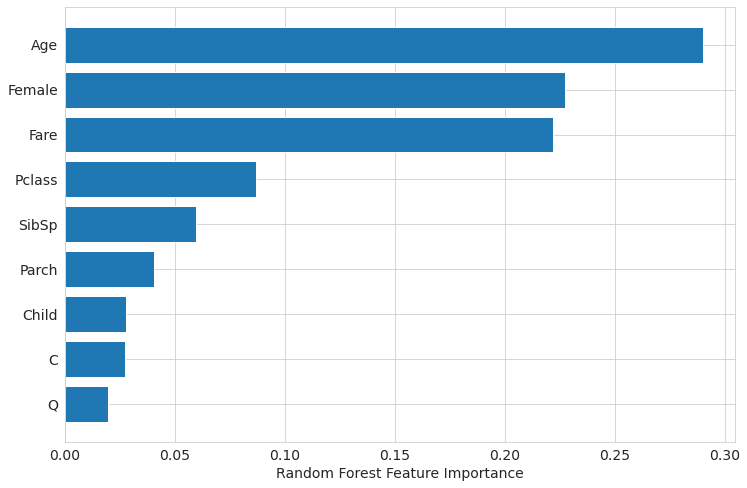

In [95]:
#get features as graph
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

sorted_idx = random_forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], random_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [96]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.944707
1,Age,-0.019811
2,SibSp,-0.383543
3,Parch,-0.171316
4,Fare,0.001962
5,C,0.486083
6,Q,0.378860
7,Child,2.239276
8,Female,2.819604
